In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 314 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf
import datetime as dt

start = dt.datetime.now() - dt.timedelta(days=1915)
end = dt.datetime.now()
df = yf.download('BTC-USD', start, end)

df["Date"] = pd.to_datetime(df.index.values)
df = df.drop(["Adj Close"], axis = 1)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,Date
Date,,,,,,
2017-01-26,902.395020,919.325989,902.223999,917.585999,131958000,2017-01-26
2017-01-27,918.359009,923.223022,915.846008,919.750000,125594000,2017-01-27
2017-01-28,919.810974,923.911011,919.810974,921.590027,68979600,2017-01-28
2017-01-29,922.067017,923.418030,919.148010,919.495972,60851700,2017-01-29
2017-01-30,920.151001,923.047974,919.473999,920.382019,78227296,2017-01-30


In [6]:
df.shape

(1916, 6)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
from sklearn.model_selection import train_test_split

training, testing = train_test_split(df, test_size=0.2, random_state=25)
X_train, X_test = training[['Open', 'High', 'Low', 'Volume']], testing[['Open', 'High', 'Low', 'Volume']]
y_train, y_test =  training[['Close']], testing[['Close']]
from datetime import datetime
import time
dt = datetime.now()
df['Date'] = pd.to_datetime(df['Date'])    
df['Date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
mapped_data = df.copy()
training_set_scaled = sc.fit_transform(training[['Open', 'High', 'Low', 'Volume', 'Close']])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [8]:
X_train.shape[1]
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

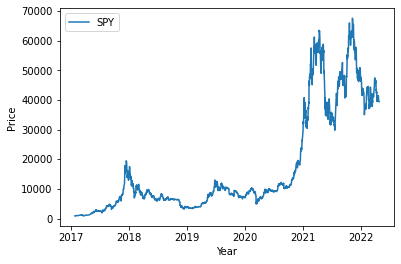

In [9]:
plt.plot(df.index, df['Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['SPY'])
plt.show()

In [11]:
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

[*********************100%***********************]  1 of 1 completed
[[  919.32598877]
 [  923.22302246]
 [  923.91101074]
 ...
 [39935.859375  ]
 [39845.92578125]
 [39592.9140625 ]]
9
Epoch 1/3
60/60 [==============================] - 18s 127ms/step - loss: 0.0166
Epoch 2/3
60/60 [==============================] - 8s 126ms/step - loss: 0.0035
Epoch 3/3
60/60 [==============================] - 8s 127ms/step - loss: 0.0030
[*********************100%***********************]  1 of 1 completed
[[  919.32598877]
 [  923.22302246]
 [  923.91101074]
 ...
 [39935.859375  ]
 [39845.92578125]
 [39592.9140625 ]]
First Financial day in 2022, when testing period begins 1916
First Financial day in 2022 minus 90 days 1907


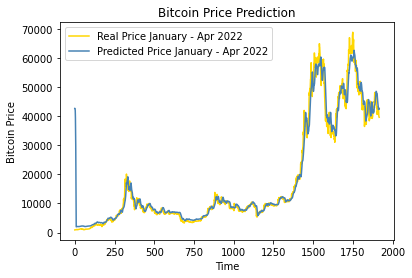

In [38]:


#--------------------- Data Preprocessing --------------------#

dataset_train = yf.download('BTC-USD', start, end)
training_set = dataset_train.iloc[:,1:2].values
print(training_set)


sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)



X_train = []
y_train = []

for i in range(9,training_set_scaled.size):

    X_train.append(training_set_scaled[i-9:i, 0])

    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)




X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])



#--------------------- Building RNN/LSTM model --------------------#

regressor = Sequential()

print(X_train.shape[1])
regressor.add(LSTM(units = 500, return_sequences=True, input_shape = (X_train.shape[1], 1)))


regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


regressor.fit(X_train, y_train, epochs = 3, batch_size = 32)

dataset_test = yf.download('BTC-USD', start, end)

real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(real_stock_price)


print("First Financial day in 2022, when testing period begins",len(dataset_total)- len(dataset_test))
print("First Financial day in 2022 minus 90 days",len(dataset_total)- len(dataset_test) - 9)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 9:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)


X_test = []
for i in range(9,inputs.size):
    X_test.append(inputs[i-9:i, 0])
X_test = np.array(X_test)




X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])


predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#--------------------- Visualizing the RNN model results--------------------#
plt.plot(real_stock_price, color = '#ffd700', label = "Real Price January - Apr 2022")
plt.plot(predicted_stock_price, color = '#4782B4', label = "Predicted Price January - Apr 2022")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


In [15]:
import yfinance as yf
import datetime as dt

start = dt.datetime.now() - dt.timedelta(days=1915)
end = dt.datetime.now()
df = yf.download('BTC-USD', start, end)

df["Date"] = pd.to_datetime(df.index.values)
df = df.drop(["Adj Close"], axis = 1)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,Date
Date,,,,,,
2017-01-26,902.395020,919.325989,902.223999,917.585999,131958000,2017-01-26
2017-01-27,918.359009,923.223022,915.846008,919.750000,125594000,2017-01-27
2017-01-28,919.810974,923.911011,919.810974,921.590027,68979600,2017-01-28
2017-01-29,922.067017,923.418030,919.148010,919.495972,60851700,2017-01-29
2017-01-30,920.151001,923.047974,919.473999,920.382019,78227296,2017-01-30


In [16]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU,CuDNNGRU
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os




class PastSampler:

    def __init__(self, N, K, sliding_window = True):
        self.K = K
        self.N = N
        self.sliding_window = sliding_window
 
    def transform(self, A):
        M = self.N + self.K     #Number of samples per row (sample + target)
        #indexes
        if self.sliding_window:
            I = np.arange(M) + np.arange(A.shape[0] - M + 1).reshape(-1, 1)
        else:
            if A.shape[0]%M == 0:
                I = np.arange(M)+np.arange(0,A.shape[0],M).reshape(-1,1)
                
            else:
                I = np.arange(M)+np.arange(0,A.shape[0] -M,M).reshape(-1,1)
            
        B = A[I].reshape(-1, M * A.shape[1], A.shape[2])
        ci = self.N * A.shape[1]    #Number of features per sample
        return B[:, :ci], B[:, ci:] #Sample matrix, Target matrix


columns = ['Close']
time_stamps = df['Date']
df_original = df
df = df.loc[:,columns]

In [39]:
df_original

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2017-01-26,902.395020,919.325989,902.223999,917.585999,131958000,2017-01-26
2017-01-27,918.359009,923.223022,915.846008,919.750000,125594000,2017-01-27
2017-01-28,919.810974,923.911011,919.810974,921.590027,68979600,2017-01-28
2017-01-29,922.067017,923.418030,919.148010,919.495972,60851700,2017-01-29
2017-01-30,920.151001,923.047974,919.473999,920.382019,78227296,2017-01-30
...,...,...,...,...,...,...
2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281,35372786395,2022-04-21
2022-04-22,40525.863281,40777.757812,39315.417969,39740.320312,28011716745,2022-04-22
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,16138021249,2022-04-23


In [40]:
df

,Close
Date,
2017-01-26,0.000000
2017-01-27,0.000032
2017-01-28,0.000060
2017-01-29,0.000029
2017-01-30,0.000042
...,...
2022-04-21,0.594302
2022-04-22,0.582493
2022-04-23,0.578688


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

In [19]:
A = np.array(df)[:,None,:]
original_A = np.array(df_original)[:,None,:]
time_stamps = np.array(time_stamps)[:,None,None]

In [20]:
NPS, NFS = 256, 16         #Number of past and future samples
ps = PastSampler(NPS, NFS, sliding_window=False)
B, Y = ps.transform(A)
input_times, output_times = ps.transform(time_stamps)
original_B, original_Y = ps.transform(original_A)

In [21]:
Y

array([[[0.05783163],
        [0.05798122],
        [0.05864874],
        [0.06795762],
        [0.07096291],
        [0.07373233],
        [0.07142773],
        [0.07213891],
        [0.07033724],
        [0.07011488],
        [0.0718828 ],
        [0.07642794],
        [0.07673027],
        [0.07638247],
        [0.07521067],
        [0.06915389]],

       [[0.08786737],
        [0.0873853 ],
        [0.08120669],
        [0.08217834],
        [0.07968919],
        [0.07982782],
        [0.08039903],
        [0.08165215],
        [0.0873853 ],
        [0.09607692],
        [0.09682321],
        [0.09826479],
        [0.0965734 ],
        [0.09755106],
        [0.09753906],
        [0.1019295 ]],

       [[0.06214971],
        [0.06423645],
        [0.06559992],
        [0.0643274 ],
        [0.06612177],
        [0.06221979],
        [0.06259566],
        [0.06270139],
        [0.06376871],
        [0.06225911],
        [0.06478654],
        [0.06503228],
        [0.06572918],
      

In [42]:
file_name='bitcoin2017to2022_close.h5'

In [43]:
import h5py
with h5py.File(file_name, 'w') as f:
    f.create_dataset("inputs", data = B)
    f.create_dataset('outputs', data = Y)

In [24]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU,CuDNNGRU
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf

from tensorflow.compat.v1.keras.backend import set_session

In [44]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.compat.v1.Session(config=config))

In [45]:
datas = B
labels = Y

In [47]:
step_size = datas.shape[1]
units= 50
batch_size = 8
nb_features = datas.shape[2]
epochs = 100
output_size=16
#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:,0]


In [46]:
model = Sequential()
model.add(GRU(units=units, input_shape=(step_size,nb_features),return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
output_file_name = 'GRU'
model.fit(training_datas, training_labels, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0099
Epoch 1: saving model to weights/GRU-01-0.30661.hdf5
1/1 [==============================] - 4s 4s/step - loss: 0.0099 - val_loss: 0.3066
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0095
Epoch 2: saving model to weights/GRU-02-0.30161.hdf5
1/1 [==============================] - 0s 231ms/step - loss: 0.0095 - val_loss: 0.3016
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0089
Epoch 3: saving model to weights/GRU-03-0.29662.hdf5
1/1 [==============================] - 0s 227ms/step - loss: 0.0089 - val_loss: 0.2966
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0087
Epoch 4: saving model to weights/GRU-04-0.29168.hdf5
1/1 [==============================] - 0s 246ms/step - loss: 0.0087 - val_loss: 0.2917
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 0.0080
Epoch 5: saving model to weights/GRU-05-0.28693.hdf5
1/1 [===============

In [48]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,:]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,:]
validation_original_outputs = original_Y[training_size:,:,:]
validation_original_inputs = original_B[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

In [49]:
ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
step_size = datas.shape[1]
batch_size= 8
nb_features = datas.shape[2]

In [50]:
model = Sequential()
model.add(GRU(units=units, input_shape=(step_size,nb_features),return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')

In [51]:
predicted = model.predict(validation_datas)
predicted_inverted = []
df_original.rename(columns={'Date':'Timestamp'}, inplace = True)
original_datas = np.array(df_original)


In [52]:
original_datas

array([[902.39501953125, 919.3259887695312, 902.2239990234375,
        917.5859985351562, 131958000, Timestamp('2017-01-26 00:00:00')],
       [918.3590087890625, 923.2230224609375, 915.8460083007812, 919.75,
        125594000, Timestamp('2017-01-27 00:00:00')],
       [919.8109741210938, 923.9110107421875, 919.8109741210938,
        921.5900268554688, 68979600, Timestamp('2017-01-28 00:00:00')],
       ...,
       [39738.72265625, 39935.859375, 39352.203125, 39486.73046875,
        16138021249, Timestamp('2022-04-23 00:00:00')],
       [39478.375, 39845.92578125, 39233.5390625, 39469.29296875,
        17964398167, Timestamp('2022-04-24 00:00:00')],
       [39487.9765625, 39592.9140625, 38338.37890625, 39416.3671875,
        30683856896, Timestamp('2022-04-25 00:00:00')]], dtype=object)

In [66]:
abc = original_datas[:,:].reshape(-1,1)

In [67]:
abc

array([[902.39501953125],
       [919.3259887695312],
       [902.2239990234375],
       ...,
       [39416.3671875],
       [30683856896],
       [Timestamp('2022-04-25 00:00:00')]], dtype=object)

In [68]:
original_datas = np.array(df_original)
abc = original_datas[:,i].reshape(-1,1)

In [69]:
abc

array([[902.39501953125],
       [918.3590087890625],
       [919.8109741210938],
       ...,
       [39738.72265625],
       [39478.375],
       [39487.9765625]], dtype=object)

In [70]:
for i in range(6):
    scaler.fit(abc)
    predicted_inverted.append(scaler.inverse_transform(predicted))
print(np.array(predicted_inverted).shape)
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(6, 2, 16)
(32,)


In [71]:
ground_true_df, gr = pd.DataFrame(), pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true

prediction_df, pred = pd.DataFrame(), pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted

#prediction_df = prediction_df.loc[(prediction_df["times"].dt.year == 2019 )&(prediction_df["times"].dt.month > 2 ),: ]
#ground_true_df = ground_true_df.loc[(ground_true_df["times"].dt.year == 2019 )&(ground_true_df["times"].dt.month > 2 ),:]


"for i in prediction_df['times']:\n  for j in ground_true_df['times']:\n    if i==j:\n      pred = pd.concat([pred, ]"

In [72]:
prediction_df

,times,value
0,2021-06-30,1694.620728
1,2021-07-01,7519.301758
2,2021-07-02,3342.556641
3,2021-07-03,4901.128906
4,2021-07-04,902.395020
5,2021-07-05,5889.390137
6,2021-07-06,7688.471680
7,2021-07-07,8232.846680
8,2021-07-08,3157.581055
9,2021-07-09,902.395020


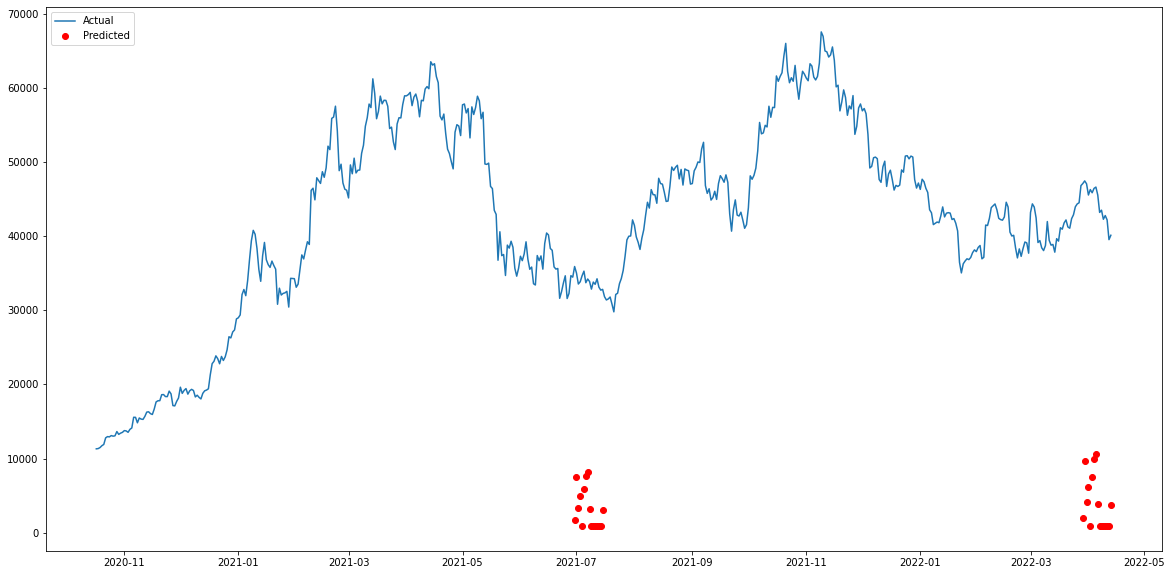

In [73]:
plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.show()